<a href="https://colab.research.google.com/github/rht6226/InnoHAR-NeuralNet/blob/master/LSTM_based_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM based model

In this module we will be training a model which uses the Long Short Term Memory based architecture for Human Activity Recognition problem on UCI HAR Mobile Dataset

In [ ]:
# imports
import numpy as np
from keras.utils import to_categorical
import json
import matplotlib

## Loading the Dataset

In [ ]:
# Get class from file
from drive.MyDrive.InnoHAR.DatasetLoader import UciMobileDataset

In [ ]:
uci = UciMobileDataset(filepath='/content/drive/MyDrive/InnoHAR/ProcessedDataset/')
uci.summary()

UCI Human Activity Recognition Dataset: 
Shape of training data = X:(7352, 128, 9), y: (7352, 6)
Shape of testing data = X:(2947, 128, 9), y: (2947, 6)


# Creating the Model

In [ ]:
# imports
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.utils.vis_utils import plot_model

In [ ]:
# LSTM based Model defined layer by layer
def get_lstm_model(X, y):
    input_shape = (X.shape[1], X.shape[2])
    n_outputs = y.shape[1]
    model = Sequential()
    model.add(LSTM(100, input_shape=input_shape))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
# Summarize the model

model_lstm = get_lstm_model(X=uci.trainX, y=uci.trainy)
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               44000     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 606       
Total params: 54,706
Trainable params: 54,706
Non-trainable params: 0
_________________________________________________________________


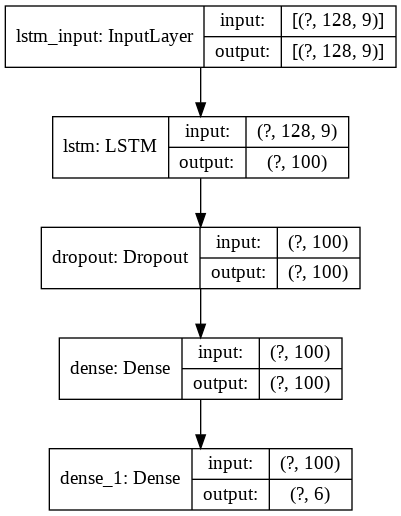

In [ ]:
# Plotting the model
plot_model(model_lstm, show_shapes=True, show_layer_names=True)

## Training the Models

Only one instance of a trained model cannot be used to determine the model performance. Hence we will be training Multiple instances of the same LSTM based model and then we will find out the average accuracy.

In [ ]:
def train_models(X=uci.trainX, y=uci.trainy, num_instances=50, verbose=1, epochs=15, batch_size=64, valid_data = (uci.testX, uci.testy)):
    # Here we will store all the models
    modelList = []

    # Training multiple models at the same time for finding average accuracy
    for i in range(num_instances):
        print("\n<========== Now training model - {} ...... =======>".format(i))

        model = get_lstm_model(X, y)
        history = model.fit(X, y, epochs=epochs, verbose=1, batch_size=batch_size, validation_data=valid_data)

        print("<==================================================>\n")

        # Finding accuracy
        _, accuracy = model.evaluate(valid_data[0], valid_data[1], batch_size=32, verbose=0)

        modelList.append({
            "model": model,
            "history": history,
            "accuracy": accuracy
        })

    return modelList

In [ ]:
epochs, batch_size = 15, 64
modelList = train_models(epochs=epochs, batch_size=batch_size)


<========== Now training model - 0 ...... =======>
Epoch 1/15
115/115 [==============================] - 2s 13ms/step - loss: 1.1410 - accuracy: 0.5058 - val_loss: 0.8765 - val_accuracy: 0.6159
Epoch 2/15
115/115 [==============================] - 1s 10ms/step - loss: 0.6995 - accuracy: 0.6974 - val_loss: 0.6848 - val_accuracy: 0.7404
Epoch 3/15
115/115 [==============================] - 1s 10ms/step - loss: 0.5708 - accuracy: 0.7832 - val_loss: 0.5666 - val_accuracy: 0.7866
Epoch 4/15
115/115 [==============================] - 1s 10ms/step - loss: 0.3981 - accuracy: 0.8619 - val_loss: 0.4830 - val_accuracy: 0.8392
Epoch 5/15
115/115 [==============================] - 1s 10ms/step - loss: 0.2569 - accuracy: 0.9106 - val_loss: 0.5175 - val_accuracy: 0.8310
Epoch 6/15
115/115 [==============================] - 1s 10ms/step - loss: 0.2106 - accuracy: 0.9240 - val_loss: 0.3739 - val_accuracy: 0.8887
Epoch 7/15
115/115 [==============================] - 1s 10ms/step - loss: 0.1713 - accura

# Compare different instances

We will compare the different instances of trained model to find the one which gives the best performance. We will also find the average accuracy for the trained models.

In [ ]:
# Imports
import matplotlib.pyplot as plt
from statistics import mean 

In [ ]:
def plot_accuracies(modelList, modelName, figureSize=[8, 8]):
    accuracies = []
    for modelDict in modelList:
        accuracies.append(modelDict['accuracy'])
    mean_accuracy = mean(accuracies)
    matplotlib.rcParams['figure.figsize'] = figureSize
    plt.plot(accuracies)
    plt.axhline(y=mean_accuracy, color='r', linestyle='-')
    plt.title('Model accuracy for different instances of - {}'.format(modelName))
    plt.ylabel('accuracy')
    plt.xlabel('Instance #')
    plt.legend(['Instance Accuracy', 'Mean Accuracy'], loc='lower right')
    plt.show()
    
    print("\n\nThe average accuracy of this model was found out to be: {}".format(mean_accuracy))

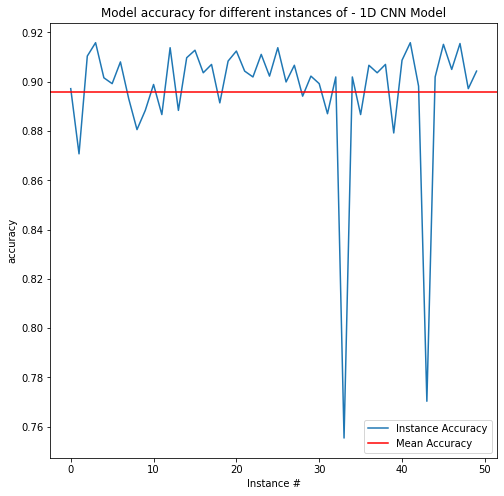



The average accuracy of this model was found out to be: 0.8959077036380768


In [ ]:
plot_accuracies(modelList, modelName='1D CNN Model')

## Selecting Model closest to Mean

here we will be selecting a model instance whose performance is the closest to the mean accuracy. This will help us in comparision between various models.

In [ ]:
# Get functions from file
from drive.MyDrive.InnoHAR.helpers import get_average_model

In [ ]:
model, history = get_average_model(modelList)

In [ ]:
## Save Model
model.save('/content/drive/MyDrive/InnoHAR/SavedModels/LSTM.h5')

## Plotting Accuracy and Losses

In [ ]:
# Get functions from file
from drive.MyDrive.InnoHAR.helpers import plot_model_accuracy, plot_model_loss

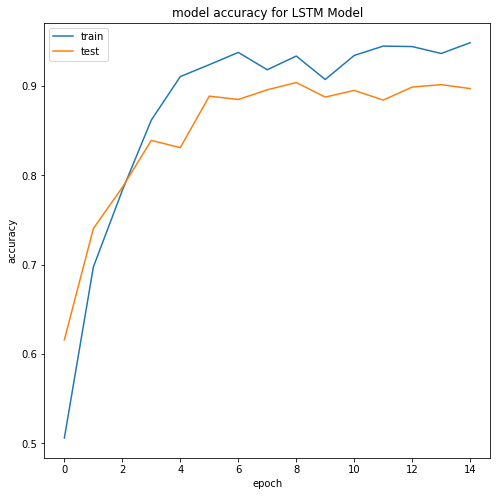

In [ ]:
plot_model_accuracy('LSTM Model', history=history)

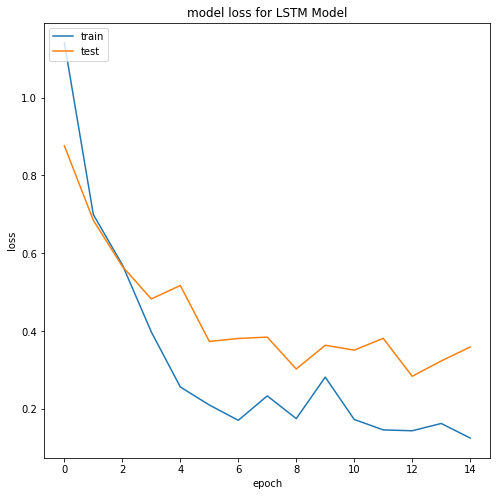

In [ ]:
plot_model_loss('LSTM Model', history=history)

## Plotting Confusion Matrix

In [ ]:
# Get functions from file
from drive.MyDrive.InnoHAR.helpers import plot_cm

Confusion matrix, without normalization


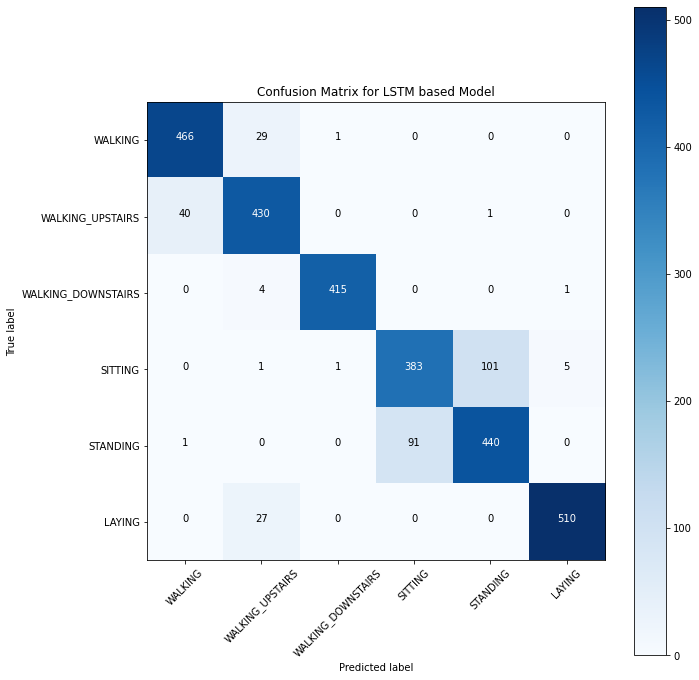

In [ ]:
plot_cm(model, test_data=(uci.testX, uci.testy), title='Confusion Matrix for LSTM based Model')

## Classification Report

In [ ]:
# Get functions from file
from drive.MyDrive.InnoHAR.helpers import print_classification_report

In [ ]:
print_classification_report(model, test_data=(uci.testX, uci.testy), title='LSTM Model')

Classification Report for 'LSTM Model': 

                    precision    recall  f1-score   support

           WALKING    0.91913   0.93952   0.92921       496
  WALKING_UPSTAIRS    0.87576   0.91295   0.89397       471
WALKING_DOWNSTAIRS    0.99520   0.98810   0.99164       420
           SITTING    0.80802   0.78004   0.79378       491
          STANDING    0.81181   0.82707   0.81937       532
            LAYING    0.98837   0.94972   0.96866       537

          accuracy                        0.89718      2947
         macro avg    0.89972   0.89957   0.89944      2947
      weighted avg    0.89777   0.89718   0.89727      2947

